# LPノルム
(https://qiita.com/kenmatsu4/items/cecb466437da33df2870)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.cm as cm
import numpy.random as rd
import matplotlib as mpl
from tabulate import tabulate

from sklearn import model_selection
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve

titanic = sns.load_dataset('titanic')

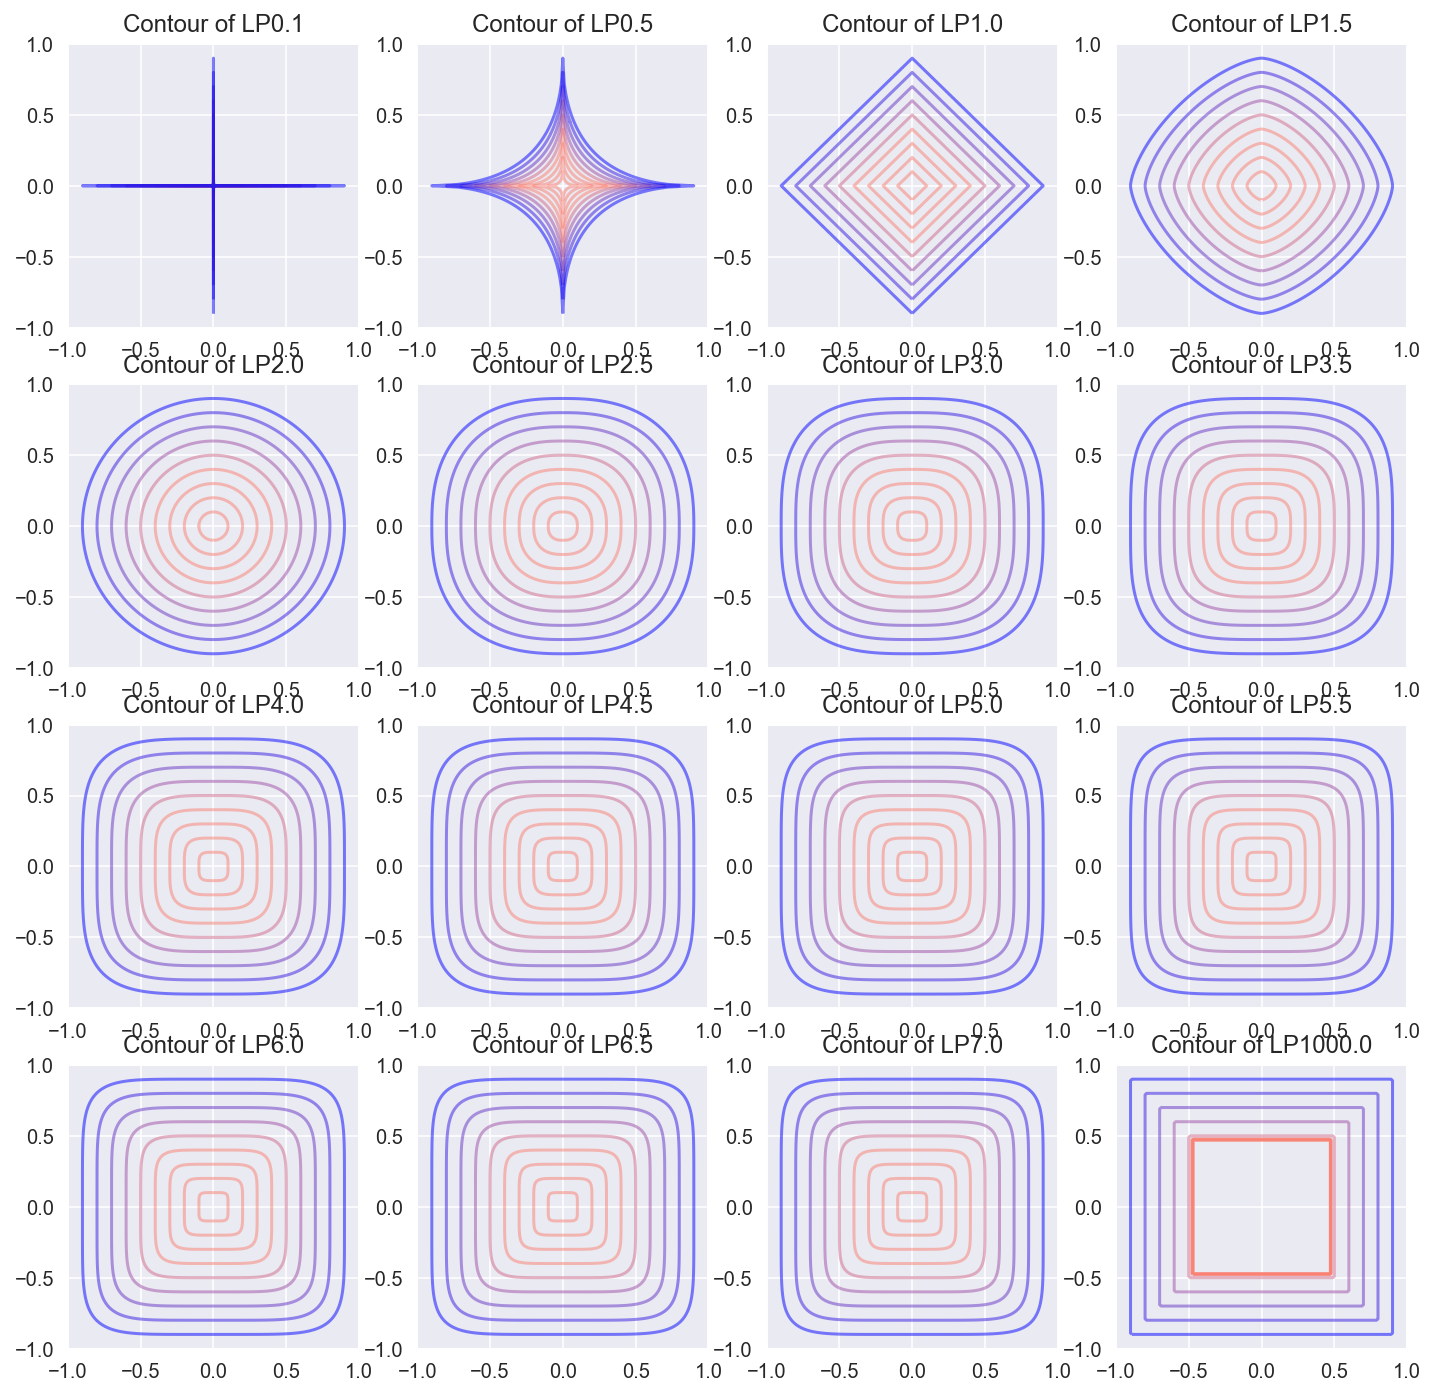

In [13]:
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

def LP(x, y, lp=1):
    x = np.abs(x) 
    y = np.abs(y)
    return (x**lp + y**lp)**(1./lp)

def draw_lp_contour(lp=1, xlim=(0, 1), ylim=(0, 1)):
    n = 201
    X, Y = np.meshgrid(np.linspace(xlim[0], xlim[1], n), np.linspace(ylim[0], ylim[1], n))
    Z = LP(X, Y, lp) 
    cm = generate_cmap(['salmon', 'salmon', 'salmon', 'salmon', 'blue'])
    interval = [i/10. -1 for i in range(20)]

    plt.contour(X, Y, Z, interval, alpha=0.5, cmap=cm)
    plt.title("Contour of LP{}".format(lp))
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

# 16種のpの値のグラフを描画
fig =plt.figure(figsize=(12,12))
size = 4
for i, lp in enumerate(np.r_[[0.1], np.linspace(0.5, 7, 14), [1000]]):
    plt.subplot(size, size, i+1)
    draw_lp_contour(lp, (-1, 1),(-1, 1))